In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.integrate import odeint

## Examen 3

1) Determine el espacio de configuraciones: es decir, con todas las condiciones iniciales posibles, en los ejes $(x,v)$, del movimiento horizontal con fricción de una masa de $0.2\ \text{Kg}$ atada a un resorte de constante elástica $k=1\ \text{N/m}$. $x$ es la posicion y $v$ velocidad. 




La ecuación de movimieto horizontal con fricción de una masa atada a un resorte está dada por:

$$ m \frac{d^2x}{dt^2} - b \frac{dx}{dt} - kx =0 $$

Donde $b$ es la constante de fricción, despejando:

$$ \frac{d^2x}{dt^2} - \frac{b}{m}\frac{dx}{dt} - \frac{k}{m}x =0 $$ \\

Como $ v(t) = \frac{dx}{dt}$ entonces: \\

$$ \frac{dv}{dt} - \frac{b}{m}v - \frac{k}{m}x =0 $$ 

Llegamos así al sistema de ecuaciones:

$$\frac{dx}{dt} = v(t)$$

$$ \frac{dv}{dt} = \frac{b}{m}v - \frac{k}{m}x$$


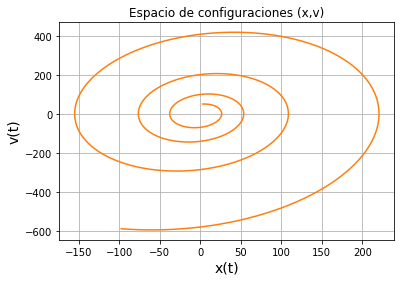

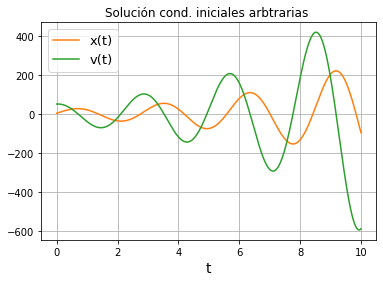

In [131]:
def pend(y,t, b,k,m):
    x, v = y
    dv_dt = [v, b*v/m - k*x/m] 
    return dv_dt

m = 0.2 
k = 1
b = 0.1

# y0 = [np.pi - 0.1, 50.0]
y0 = [np.pi - 0.1, 50.0]
t = np.linspace(0, 10, 1000)

sol = odeint(pend, y0, t, args=(b,k,m))

plt.plot(sol[:, 0], sol[:, 1], 'C1')
plt.title('Espacio de configuraciones (x,v)')
plt.xlabel('x(t)', fontsize = ftsz)
plt.ylabel('v(t)', fontsize = ftsz)
plt.grid()
plt.show()

plt.plot(t, sol[:, 0], 'C1', label='x(t)')
plt.plot(t, sol[:, 1], 'C2', label='v(t)')
plt.title('Solución cond. iniciales arbtrarias ')
plt.legend(loc='best', fontsize = 13)
plt.xlabel('t', fontsize = ftsz)
plt.grid()
plt.show()

2) Considere una muestra de Strontium-90, ${}^{90}_{38}\text{Sr}$, que contieme inicialmente 1000 núcleos de Strontium-90 sin decaer. En la base de datos: 

[https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/data/strontium.json](https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/data/strontium.json) 

se tienen los datos de decaimiento durante 200 años. Despues de 10 años quedan 809 nucleos sin decaer, después de 22 años quedan 564 y así sucesivamente. 

El decaimiento radiativo está determinado por la formula
$$
N(t)=N_0 \operatorname{e}^{-\lambda t}\,,\qquad \lambda=\frac{\ln(2)}{\tau}
$$
* $N(t)$ es el número de núcleos radioactivos que qedan despues de un tiempo $t$
* $N_0$ es el número inicial de las partículas presentes (es decir, $t=0$)
* $\lambda$ es la constante de decaimiento
* $\tau$ es la vida medía, es decir, el tiempo durante el cual la mitad de la muestra radioactiva ha decaído.

(a) Realice un fit a los datos y determine la vida media con su respectivo error.

(b) Grafique los datos como puntos en el plano $t$, $N(t)$ y el correspondiente al fit

In [3]:
URL = 'https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/data/strontium.json'
df = pd.read_json(URL)

In [83]:
No = df['N(t)'][0] # Valor inicial dado por la tabla 

def N(t,tau): return No * np.exp(-np.log(2)*t/tau) #Función modelo

tau_fit, err = curve_fit(N, df.t , df['N(t)']) #Método para encontrar el parámetro 
var = np.sqrt(np.diag(err)) #Error en el fit

In [85]:
print(f'Vida media: {np.round(tau_fit,3)} +/- {np.round(var,3)} años')

Vida media: [27.992] +/- [0.409] años


## Vida media: (28.0 +/- 0.4) años

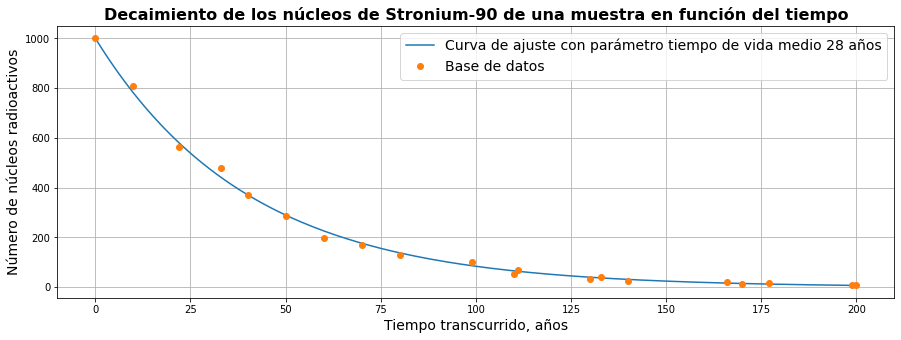

In [82]:
t = np.arange(0,200, 1)
ftsz = 14

plt.figure(figsize = (15,5))

plt.plot(t, N(t,tau_fit), label = 'Curva de ajuste con parámetro tiempo de vida medio 28 años')
plt.plot(df.t, df['N(t)'],'o', label = 'Base de datos')

plt.title('Decaimiento de los núcleos de Stronium-90 de una muestra en función del tiempo', weight='bold', fontsize = ftsz+2)
plt.xlabel('Tiempo transcurrido, años', fontsize = ftsz)
plt.ylabel('Número de núcleos radioactivos', fontsize = ftsz )
plt.legend(fontsize = ftsz)
plt.grid()

plt.show()